In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import numpy as np
import matplotlib as mpl

In [2]:
mpl.rcParams.update({
    "font.family":        "sans-serif",
    "font.sans-serif":    ["Arial"],
    "font.size":          10.0,   # global
    "axes.titlesize":     11.0,
    "axes.labelsize":     10.0,
    "xtick.labelsize":    10.0,
    "ytick.labelsize":    10.0,
    "legend.fontsize":    9.0,

    "axes.linewidth":     0.8,
    "xtick.direction":    "out",
    "ytick.direction":    "out",
    "xtick.major.size":   3.5,
    "xtick.major.width":  0.8,
    "ytick.major.size":   3.5,
    "ytick.major.width":  0.8,
    "xtick.minor.size":   2.5,
    "xtick.minor.width":  0.6,
    "ytick.minor.size":   2.5,
    "ytick.minor.width":  0.6,
    "xtick.minor.visible": False,
    "ytick.minor.visible": True,

    "xtick.major.pad":    3,
    "ytick.major.pad":    3,
    "axes.labelpad":      4,
    "axes.titlepad":      5,

    "lines.linewidth":    0.9,
    "axes.grid":          False,
    "savefig.dpi":        300,
    "savefig.bbox":       "tight",
})

UCM_COLOR = "#b6d4fe"

In [3]:
def plot_seasonal_statistics_tur(plt_var1, ax, ymin, ymax, panel_type):
    """
    plt_var1: 2D array, shape (4, N+1)
              row 0-3: SWup, LWup, Qh, Qle
              col 0:   CoLM-U value
              col 1:   UCMs (18 models) used to build distribution
    """
    var_labels = ["SWup", "LWup", "Qh", "Qle"]

    # 18 (UCM models) × 4 variables
    reshape_var1 = np.zeros((18, 4), dtype=float)
    for ivar in range(len(var_labels)):
        reshape_var1[:, ivar] = plt_var1[ivar, 1:]

    df = pd.DataFrame(reshape_var1, columns=var_labels)
    df["Source"] = "UCMs in Urban Plumber2"

    df_melted = df.melt(
        id_vars=["Source"],
        value_vars=var_labels,
        var_name="Variable",
        value_name="Value",
    )

    boxprops     = dict(linewidth=0.8, edgecolor="0.2", facecolor=UCM_COLOR)
    medianprops  = dict(linewidth=1.0, color="0.0")
    whiskerprops = dict(linewidth=0.8, color="0.3")
    capprops     = dict(linewidth=0.8, color="0.3")

    sns.boxplot(
        data=df_melted,
        x="Variable",
        y="Value",
        hue=None,
        linewidth=0.8,
        boxprops=boxprops,
        medianprops=medianprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        showfliers=False,
        width=0.4,
        ax=ax,
    )

    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(ymin, ymax)

    for i in range(4):
        y_val = plt_var1[i, 0]
        ax.scatter(
            i,
            y_val,
            color="black",
            marker="*",
            s=55,
            zorder=10,
            label="CoLM-UBCM" if i == 0 else "",
        )

    x_ticks = [0, 1, 2, 3]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([
        r"$SW_{up}$",
        r"$LW_{up}$",
        r"$Q_{h}$",
        r"$Q_{le}$",
    ])

    ax.tick_params(axis="x", which="major", top=False)
    ax.tick_params(axis="y", which="major", right=False)
    ax.tick_params(axis="y", which="minor", right=False)

    if panel_type == "R":
        ax.yaxis.set_minor_locator(MultipleLocator(0.05))
        ax.yaxis.set_major_locator(MultipleLocator(0.1))
    else:
        ax.yaxis.set_minor_locator(MultipleLocator(5))
        ax.yaxis.set_major_locator(MultipleLocator(10))

    # ax.grid(axis="y", linestyle="--", linewidth=0.5, color="0.85", zorder=0)

    leg = ax.get_legend()
    if leg is not None:
        leg.remove()

    for spine in ax.spines.values():
        spine.set_linewidth(0.8)

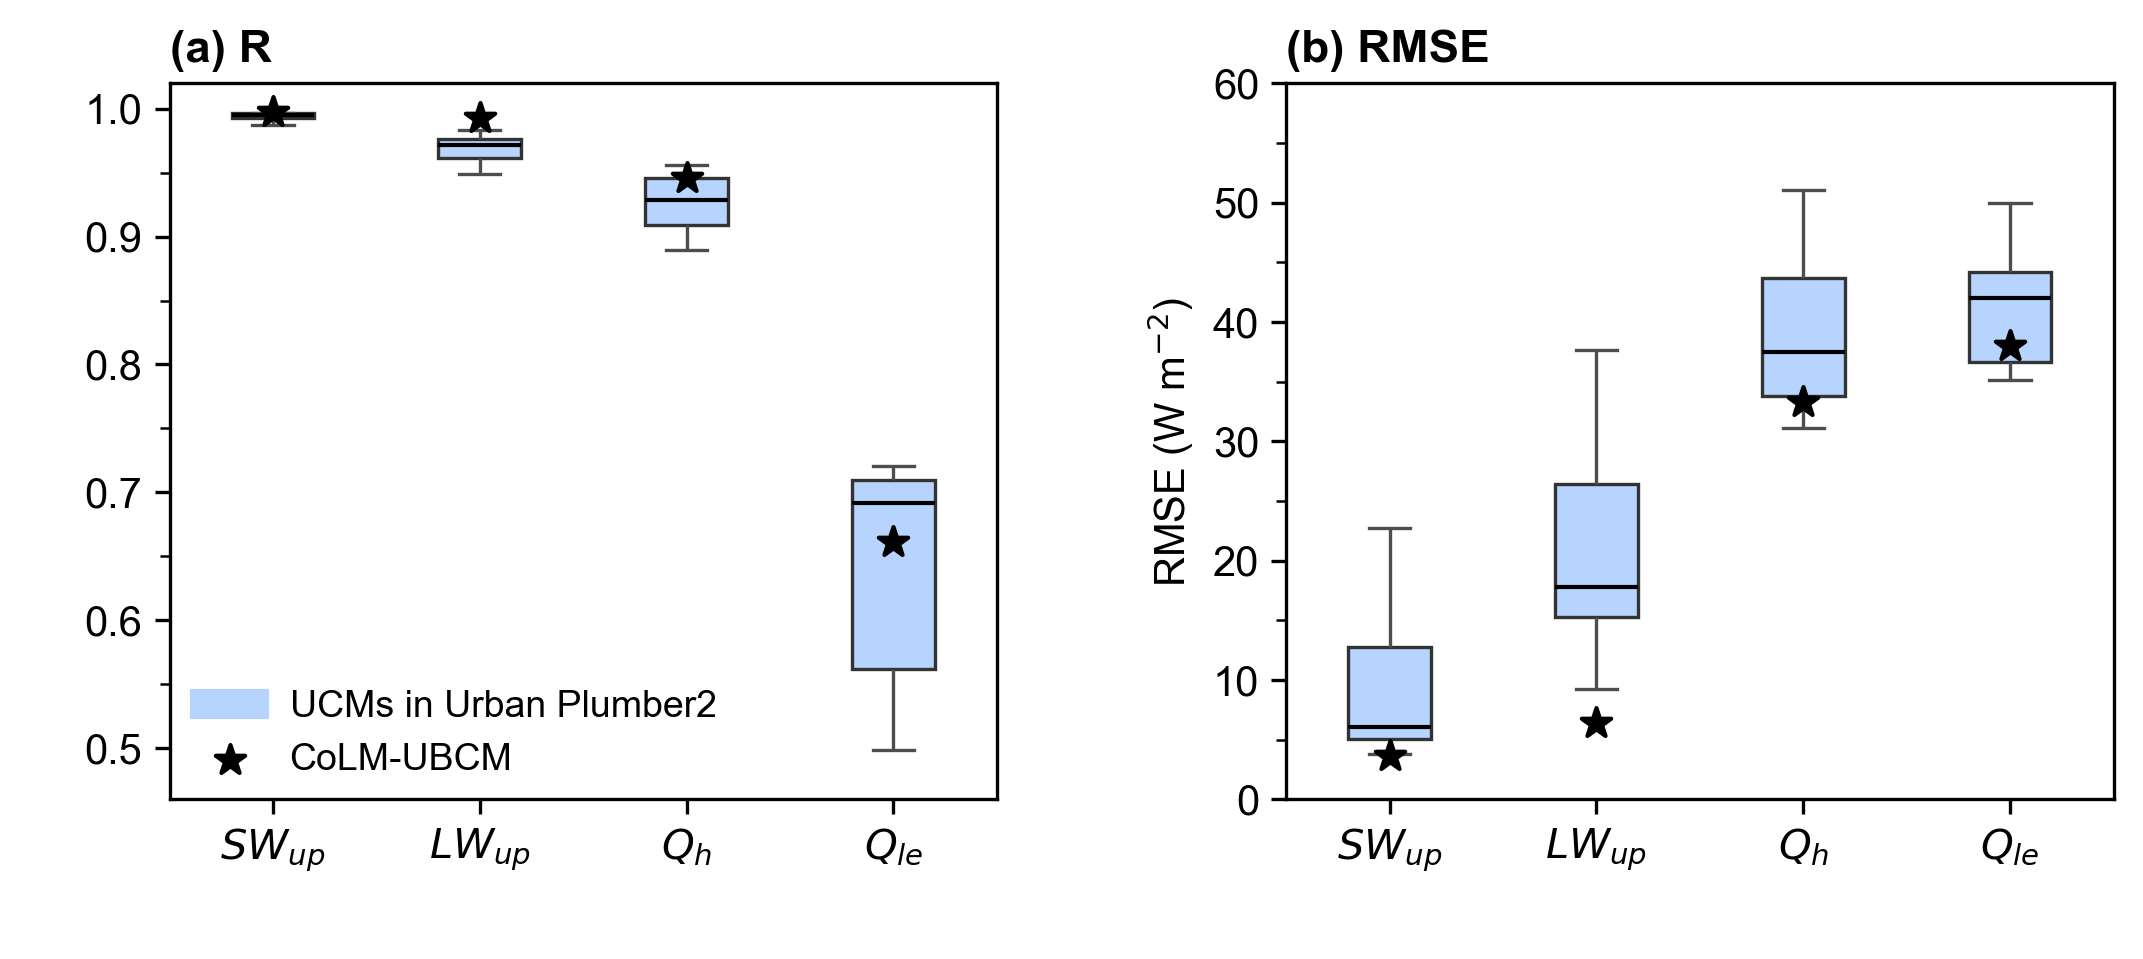

In [4]:
df_r    = pd.read_csv("./R_results.csv",    header=0, index_col=0)
df_rmse = pd.read_csv("./RMSE_results.csv", header=0, index_col=0)

fig = plt.figure(figsize=(7.2, 3.1), dpi=300)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title(r"(a) R", loc="left", fontweight="bold")
ax1.set_ylabel(" ")
ax1.set_xlabel(r" ")

plot_data_r = df_r.to_numpy()
plot_seasonal_statistics_tur(plot_data_r, ax1, 0.46, 1.02, panel_type="R")

ucm_patch   = mpatches.Patch(color=UCM_COLOR, label="UCMs in Urban Plumber2")
star_handle = ax1.scatter([], [], color="black", marker="*", s=55, label="CoLM-UBCM")

ax1.legend(
    handles=[ucm_patch, star_handle],
    loc="lower left",
    frameon=False,
    borderaxespad=0.2,
    handletextpad=0.6,
    columnspacing=0.8,
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title(r"(b) RMSE", loc="left", fontweight="bold")
ax2.set_ylabel(r"RMSE (W m$^{-2}$)")
ax2.set_xlabel(r" ")

plot_data_rmse = df_rmse.to_numpy()
plot_seasonal_statistics_tur(plot_data_rmse, ax2, 0, 60, panel_type="RMSE")

# fig.text(0.5, 0.02, "Variable", ha="center", va="center", fontsize=10)

fig.subplots_adjust(wspace=0.35, left=0.08, right=0.98, top=0.93, bottom=0.16)

plt.savefig("Figure13.pdf", format="pdf", bbox_inches="tight", dpi=300)